# Using PSF Grids

WebbPSF includes functionality designed to work with the [Photutils](https://photutils.readthedocs.io) package to
enable precise PSF-fitting photometry and astrometry. This makes use of the
[GriddedPSFModel](https://photutils.readthedocs.io/en/stable/api/photutils.psf.GriddedPSFModel.html) class, which implements a
version of the empirical or effective PSF ("ePSF") modeling framework pioneered by Jay
Anderson, Ivan King, and collaborators. This approach has been highly successful with
HST and other space observatories, and we expect it will also be productive with JWST.
In practice we will want to use ePSF models derived from real observations, but for now
we can make them in simulation.

The first step is to create a grid of fiducial PSFs spanning the
instrument/detector of choice. This can be done using the [`psf_grid`](https://webbpsf.readthedocs.io/en/latest/api/webbpsf.SpaceTelescopeInstrument.html#webbpsf.SpaceTelescopeInstrument.psf_grid) method
which will output a (list of or single) photutils GriddedPSFModel
object(s). Users can then use photutils to apply interpolation to the grid to
simulate a spatially dependent PSF anywhere on the instrument, without having
to perform a full PSF calculation at each location. This faster approach is
critical if you're dealing with potentially tens of thousands of stars
scattered across many megapixels of detector real estate.




**Jupyter Notebook**:

See [this Gridded PSF Library tutorial notebook](https://github.com/spacetelescope/webbpsf/blob/stable/notebooks/Gridded_PSF_Library.ipynb)
    for more details and example code.



## Example PSF grid

The `psf_grid` method is used to compute a PSF grid. It takes many of the same arguments as does `calc_psf`. In addition, it takes a `num_psfs` argument for the number of PSF to include in the grid. This must be a square integer; for instance `num_psfs=9` will compute a 3x3 grid, and so on.
Here's one example of that.


In [2]:
%matplotlib inline
import webbpsf

In [4]:
nrc = webbpsf.NIRCam()
nrc.filter='F212N'
nrc.detector='NRCA3'

grid = nrc.psf_grid(num_psfs=36, all_detectors=False, verbose=False)

The returned object is a [Photutils ePSF model](https://photutils.readthedocs.io/en/stable/epsf.html) and can be used with the functions in `photutils` for PSF-fitting photometry and astrometry.

Photutils also includes convenient functions for displaying PSF grids.
PSF grid calculations are useful for visualizing changes in the PSF across instrument fields of view.


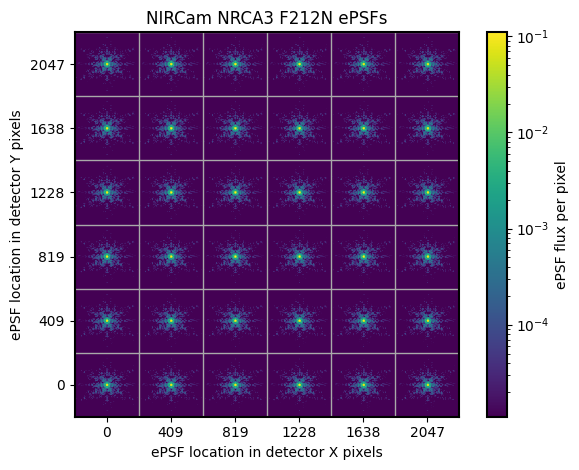

In [9]:
grid.plot_grid();

Above: An example of grid calculated across the NRCA3 detector in NIRCam. These PSFs are all very similar to the eye. 

We can adjust the display to highlight the differences, and thus make the field dependence easier to see:

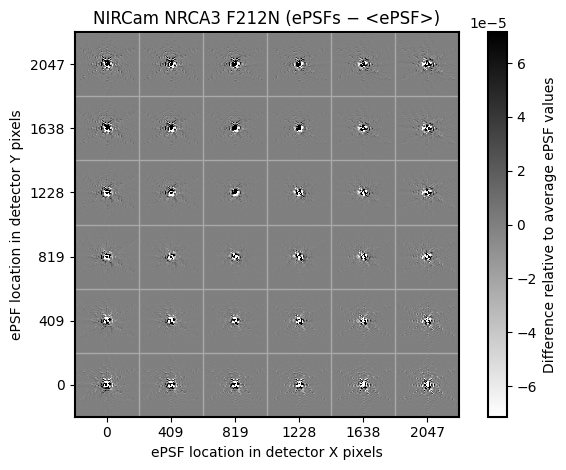

In [10]:
grid.plot_grid(deltas=True);

By subtracting off the average PSF, the subtle model-predicted differences from point to point become clear. 